# How long would it take to fall through the Earth?

**A computational essay by Karl Henrik Fredly, undergraduate at the University of Oslo (karlhf@student.uv.uio.no)**

## Introduction

The year is 2094, and a man named Bruce is on his way to the North Pole Tropical Resort. He believes that he will arrive there one hour early to a meeting with his polish friend Antoni. But Bruce has made a huge mistake: Antoni is on the South Pole, while his other polish friend is the one that is on the North Pole. He got his poles mixed up! Luckily, the Resort has dug a tunnel through the Earth, which Bruce can fall through to get to Antoni. However, the question remains: Will Bruce make it in time to his meeting? How long does it take to fall through the Earth?

In this computational narrative, I am going to look at the movement during a fall under the influence of the Earth's gravity, without being hindered by the ground or the air. Solving this kind of problem might be relevant when exploring space, where moving through a big object might occur, in contrast to the Earth which is practically impossible to move through.

I will look at how position, velocity and acceleration changes during the fall, and use these findings to better understand the movement. To achieve this, I will first describe gravity in and around spherical objects, then find how the Earth's mass changes with radius, and finally combine these two models to describe the fall through the Earth.

<img src="FallingThroughTheEarthResources/KolaBorehole.jpg" alt="Drawing" style="width: 60%;"/>

*The Kola Borehole (From <a href="http://www.absolute-knowledge.com/unexpected-discoveries-kola-superdeep-borehole/">absolute-knowledge.com</a>)*

## Gravity in and around the Earth

For the purpose of this essay I am going to assume that the Earth is a perfect sphere with a varying density given by the [Preliminary Reference Earth Model (PREM)](https://en.wikipedia.org/wiki/Preliminary_reference_Earth_model). This model gives the density of the Earth at different distances from the center.


I will also assume that there is no air resistance. With air resistance, Bruce would quickly reach terminal velocity and slowly lose all of his speed, getting trapped in the center of the Earth. Furhermore, I will assume that the fall is from pole to pole, as the Earth's rotation would interfere if that was not the case.

### The Shell Theorem

The main difference between being affected by gravity while outside the Earth, and being affected while inside it, is how much of it is below you to "pull you down". As you venture further down, less of the Earth will be below you to pull you down, and more of it will be above you to pull you up. In addition to this, as you get closer to different parts of the Earth, they will have a greater pull on you due to being closer to you.

The aforementioned factors lead to some calculations beyond the scope of this narrative, which will not be addressed. I will instead use a result called the [Shell Theorem](http://hyperphysics.phy-astr.gsu.edu/hbase/Mechanics/sphshell2.html) which makes this problem much more manageable. The Shell Theorem has the following implications for this problem:

- A spherically symmetric body affects external objects gravitationally as though all of its mass were concentrated at a point at its centre
- When at a distance r from the center, all mass at a greater distance than r can be ignored

This means that I don't have to calculate the gravitational pull from all throughout the Earth, since I can act as if all of the Earth's mass is located in its center. I also only need to worry about the what is further in than the point Bruce is currently at.

<img src="FallingThroughTheEarthResources/ShellTheorem.jpg" alt="Drawing" style="width: 60%;"/>

The gravitational force between two objects is given by $F = \frac{GMm}{r^2}$

where G is the gravitational constant $6.68\times10^-11\frac{Nm^2}{kg^2}$, M is the mass of one of the objects, m is the mass of the other object and r is the distance between the objects. The force acts on both of the objects, and is pointed from one object to the other.

M will be the mass of the Earth that needs to be considered. M will vary however, so I will need to use the PREM to find the total mass of the Earth at different distances from the center.

### The variable density of the Earth

For plotting and calculations I import numpy, pyplot and polynomial.

In [1]:
import numpy as np #Used for mathematical functions and constants
import matplotlib.pyplot as plt #Used for plotting
import numpy.polynomial.polynomial as poly #Used later for finding a polynomial that approximates the data

The Preliminary Reference Earth Model gives the density of the Earth at different distances from the center. 

The data can be found here: http://ds.iris.edu/ds/products/emc-prem/ at "Model Download". I use the file "PREM_ANISOTROPIC".

First I read the data and store them in arrays.

In [2]:
radius = []
density = []

#The file has 199 lines starting with "[Radius] [Density]" that we read like this
infile = open("FallingThroughTheEarthResources/PREM_ANISOTROPIC.txt","r")
lines = infile.readlines()
for line in lines[3:]: #The data starts at line 3.
    numbers = line.split()
    radius.append(float(numbers[0]))
    density.append(float(numbers[1]))
infile.close()
radius = np.array(radius) #I store the radius and density to numpy arrays in order to easily divide them by 1000 for plotting
density = np.array(density)

Using pylot I plot the data:

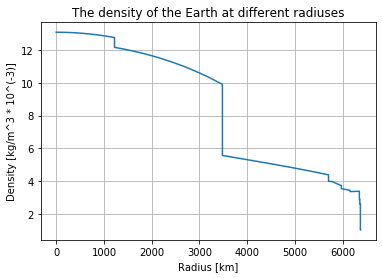

In [3]:
plt.plot(radius/1000,density/1000) #Dividing by 1000 to get more plot-friendly units
plt.xlabel("Radius [km]")
plt.ylabel("Density [kg/m^3 * 10^(-3)]")
plt.title("The density of the Earth at different radiuses")
plt.grid()
plt.show()

*This image (taken from <a href="https://en.wikipedia.org/wiki/Structure_of_the_Earth">en.wikipedia.org/wiki/Structure_of_the_Earth</a>) shows how the different layers and densities of the earth fit together.*

<img src="FallingThroughTheEarthResources/RadialDensityPREM.jpg" alt="Drawing" style="width: 70%;"/>

### Mass at different heights

Next ! need to find out how the total mass further in changes with a varying radius. By working my way from the center I can add one and one "shell" to find the total mass at different distances from the center. I have to find the total mass by adding these shells due to the relatively rough resolution of our density data.

![title](FallingThroughTheEarthResources/EarthShells.jpg)

Note that I use the same density for the inner and outer distance to calculate the mass of the shell. The density I use for the spheres is the average of the Earth's density at the outer and inner radius of the shell. So that:

$$ M_{shell} = M_{outer} - M_{inner} = \frac{4}{3}\pi r_{outer}^3 Density - \frac{4}{3}\pi r_{inner}^3 Density $$

By doing this calculation for every shell and adding them up, I find the total mass of the Earth up to any distance from the center. This process is known as numerical integration using the midpoint rule, and in code it looks like this:

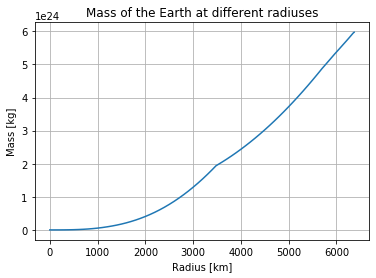

In [4]:
pi = np.pi
masses = []
shellMass = 4/3*np.pi*radius[0]**3*density[0] #The innermost shell. In our case this has a mass of 0.
masses.append(shellMass)

for i in range(1,len(radius)):
    shellDensity = (density[i-1]+density[i])/2 #The average of the density at the outer and inner radius
    #We find the mass of the shells corresponding to every data point
    shellMass = 4/3*pi*radius[i]**3*shellDensity - 4/3*pi*radius[i-1]**3*shellDensity
    #We add the next total mass to the list, adding the mass of the current shell with the previous total mass
    masses.append(shellMass + masses[i-1])
    
plt.plot(radius/1000,masses)
plt.xlabel("Radius [km]")
plt.ylabel("Mass [kg]")
plt.title("Mass of the Earth at different radiuses")
plt.grid()
plt.show()

The total mass increases very slowly near the center, and faster near the surface. While the density is higher near the center, the volume is much smaller. Meaning that the total mass does not change much when the radius increases at first, as the volume of the inner shells are so small.

I can compare the total mass at the outermost radius, with the actual mass of the Earth, which is about $5.972*10^{24}kg$, to get an idea of the accuracy of our calculations.

In [5]:
print("The total mass we find using this model is {:.3E} kg".format(masses[-1]))

The total mass we find using this model is 5.973E+24 kg


This accuracy is encouraging. Note that the total mass is not the only useful result here, as I will use the mass at different radiuses to find the acceleration.

## Acceleration at different heights

The gravitational force between two objects is given by $F = \frac{GMm}{r^2}$. The Shell Theorem states that at a distance $r$ from the center, one only needs to consider the mass further in than $r$. Additionally, Newton's second law states that force is equal to mass times acceleration, so that:

$$
\begin{align*}
F = ma \Rightarrow a = \frac{F}{m} = \frac{GMm}{r^2m} = \frac{GM}{r^2}
\end{align*}
$$

This means that Bruce's mass won't mean anything, just like in real life. From here I find the acceleration at the different radiuses in the dataset:

In [6]:
G = 6.674 * 10**(-11) #The gravitational constant
acceleration = []
acceleration.append(0) #I need to handle the initial acceleration here to not have to divide by zero in the loop

for i in range(1,len(radius)):
    acceleration.append(G*masses[i]/(radius[i]**2))
acceleration = np.array(acceleration)

I can plot these findings as well. I am eventually going to need a general function for gravity since this dataset does not give the acceleration at the distances between the data points. To better show this I will plot only the data as points next to the smooth graph.

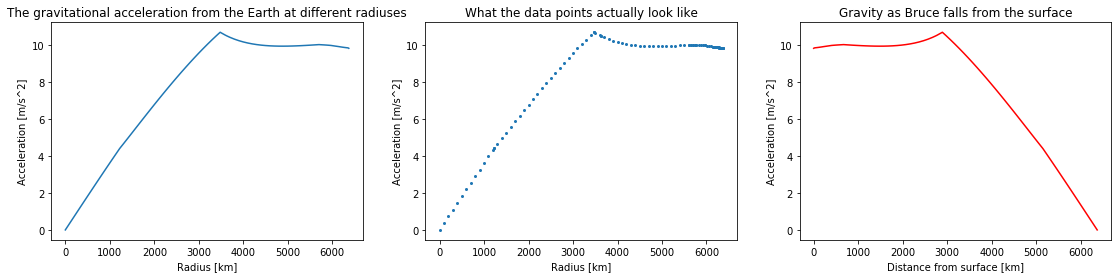

In [7]:
plt.figure(figsize=(19, 4))
plt.subplot(131)
plt.plot(radius/1000,acceleration) #The smooth graph
plt.xlabel("Radius [km]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("The gravitational acceleration from the Earth at different radiuses")

plt.subplot(132)
plt.plot(radius/1000, acceleration, linestyle="", marker="o", markersize=2) #The data plotted as points
plt.xlabel("Radius [km]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("What the data points actually look like")

plt.subplot(133)
#We also plot how gravity changes moving from the surface and down by turning the plot around.
plt.plot(abs(radius-radius[-1])/1000,acceleration, color="red")
plt.xlabel("Distance from surface [km]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("Gravity as Bruce falls from the surface")

plt.show()

The red graph shows that as Bruce starts falling, the acceleration will first stay nearly constant before increasing slightly until about 3000km. This is because, as he gets closer to the more dense inner parts of the Earth, the gravitational pull from them will increase. Since the outer layers are so much less dense than the mantle or core, he does not "lose" much gravitational pull compared to the pull he gains from being closer to the denser parts. When he is at around 3000 km, gravity starts weakening. This happens because the amount of mass pulling him down is starting to reduce fast.

### Creating a function to describe the acceleration

So far I have worked out the acceleration at all the points that the dataset contains, but if I am to calculate what a fall through the Earth would look like I will need a general formula, or a function that finds the acceleration at any height.

I can achieve this by using the method <a href="https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.polynomial.polynomial.polyfit.html">polyfit.</a> Polyfit uses linear algebra to find the polynomial that best fits the data points given. I have found that a polynomial of degree 3 works well here, and that using a separate polynomial before and after the maximum spike of the acceleration offers greater accuracy.

In [8]:
turn = np.argmax(acceleration) #The spike in the acceleration graph
deg = 3
#The following two lines use linear algebra to find polynomials that I can use to find gravity at any height
coefs1 = poly.polyfit(radius[:turn], acceleration[:turn], deg) #Polynomial for the points further in than the "spike"
coefs2 = poly.polyfit(radius[turn:], acceleration[turn:], deg) #Polynomial for the points further out than the "spike"

earthRadius = radius[-1]
earthMass = masses[-1]
def grav(r): #This function returns the gravitational acceleration at any radius
    dist = abs(r) #The absolute value of the distance
    direc = -np.sign(r) #The direction of gravity. It is opposite of our position, since gravity pulls us towards the center

    if dist > earthRadius: #If we are outside the Earth
        return(direc*G*earthMass/r**2) #Normal formula for acceleration using the mass of the entire Earth

    elif dist < radius[turn]: #If we are further in than the "spike"
        sum = 0
        for i in range(deg+1): #a0 + a1*r + a2*r**2 + a3*r**3
            sum += coefs1[i]*dist**(i) #Adding up all of the coefficients times the radius
        return(direc*sum)
    
    else: #Function 2 for distances further out than the "spike"
        sum = 0
        for i in range(deg+1):
            sum += coefs2[i]*dist**(i)
        return(direc*sum)

I will not go into detail on how these polynomials that I will use as a general function for gravity are found. However, it is important to understand that what I did was find polynomials that have graphs that are similar to the one I just plotted. If I write out the coefficients of the first polynomial, the one that approximates gravity between the surface and the "spike" in gravity, they look like this:

In [9]:
print(coefs1)

[-2.93375495e-02  3.87773093e-06 -2.39818116e-13  3.84955504e-21]


$$
\begin{align*}
f_1(r) &= a_0 + a_1r^1 + a_2r^2 + a_3r^3 \\
f_1(r) &= -2.93*10^{-2} + 3.88*10^{-6}r - 2.40*10^{-13}r^2 + 3.85*10^{-21}r^3
\end{align*}
$$

To show this new general function in relation to the values for gravitational acceleration I found from the data, I will plot them together and summarize the errors for every point:

Total error = 1.0836096370862585


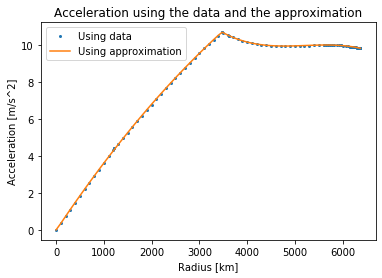

In [10]:
accelApprox = [abs(grav(r)) for r in radius] #Note that we are only interested in the size of the acceleration here
error = 0
for i in range(len(radius)):
    error += abs(accelApprox[i] - acceleration[i]) #How much the line misses by at every point
print("Total error = {}".format(error))

plt.plot(radius/1000,acceleration, label="Using data", linestyle="", marker="o", markersize=2)
plt.plot(radius/1000,accelApprox, label="Using approximation")
plt.xlabel("Radius [km]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("Acceleration using the data and the approximation")
plt.legend()
plt.show()

There is very little difference, which is the goal. This function for gravitational acceleration works for the distances in between the points in our dataset, *and* the ones outside. If Bruce was further out than the radius of the Earth (above the ground), the function would give the acceleration using the formula $\frac{GM}{r^2}$ with the total mass of the Earth as M. This means that I can find the acceleration outside the Earth and all over the insides of the Earth.

So far I have looked at positive distances and positve accelerations for the sake of seing how their sizes relate. From now on I will include the direction of gravity in the calculations. When Bruce is above the center, gravity will point down, and when he is below the center, gravity will point up. The sign of gravity will be the opposite of the sign of his height.

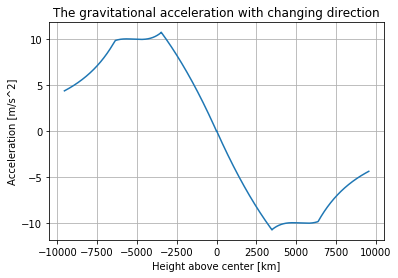

In [11]:
rads = np.linspace(-radius[-1]*1.5,radius[-1]*1.5,10000)
accs = np.array([grav(i) for i in rads])

plt.plot(rads/1000,accs)
plt.xlabel("Height above center [km]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("The gravitational acceleration with changing direction")
plt.grid()
plt.show()

With the function for gravitational acceleration, I am ready to start calculating the movement.

## Calculating movement under the effect of a variable gravity

I will first need to define some parameters. I found that 10000 steps of 1 second gives good accuracy and speed for the purpose of this narrative.

In [12]:
n = 10000 #number of steps in our calculation
dt = 1 #number of seconds each step takes

Bruce's position will be starting at the surface of the Earth (at a heigh equal to the Earth's radius), and will then decrease as he gets closer to the center, reaching negative values when he is below the center.

His velocity starts at 0m/s and will then decrease as he accelerates downward.

These arrays will be filled with the results of the calculations as I use the Euler-Cromer method, and will be used for plotting.

In [13]:
positions = np.zeros(n)
positions[0] = earthRadius #You can change this initial height to see how the fall would look like from outer space for example

#This is redundant, as the array is all zeroes. However, you can change this value to see how that changes the results
startingVelocity = 0
velocities = np.zeros(n)
velocities[0] = startingVelocity

accelerations = np.zeros(n)

times = np.linspace(0,n*dt,n)

I have the initial conditions and function for acceleration in order, so all that's left is using the Euler-Cromer method to find the positions, velocities and accelerations of the movement over time:

In [14]:
for i in range(n-1):
    accelerations[i] = grav(positions[i])
    velocities[i+1] = velocities[i] + accelerations[i]*dt
    positions[i+1] = positions[i] + velocities[i+1]*dt
accelerations[n-1] = grav(positions[n-1]) #The acceleration at the end is not calculated during the loop

I use the Euler-Cromer method due to the fact that there is no simple way to get a function for the position. I have no way of finding the exact position and velocity that we will have in the future, so instead I find the acceleration right now and use that to find the velocity Bruce would have after a small time step if the acceleration was constant (which it pretty much is over a small time step). Using this velocity I find the position he would have after a small time step if velocity was constant (which it pretty much is over a small time step). With enough of these time steps I can approximate a movement with a variable acceleration and velocity over a longer period of time.

I can plot the results side by side in subplots:

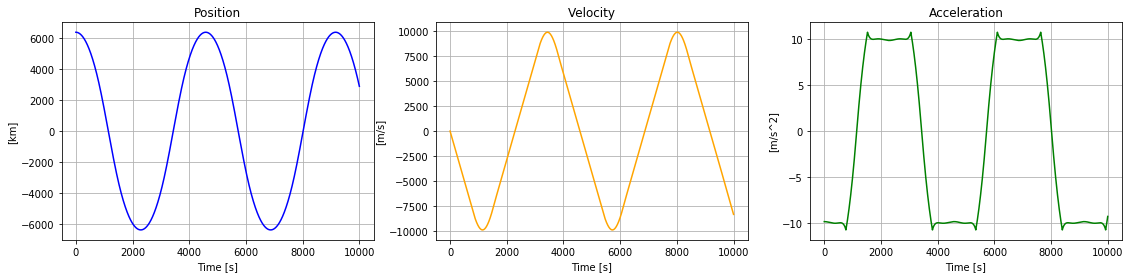

In [15]:
plt.figure(figsize=(19, 4))
plt.subplot(131)
plt.plot(times,positions/1000,color="blue")
plt.xlabel("Time [s]")
plt.ylabel("[km]")
plt.title("Position")
plt.grid()

plt.subplot(132)
plt.plot(times,velocities,color="orange")
plt.xlabel("Time [s]")
plt.ylabel("[m/s]")
plt.title("Velocity")
plt.grid()

plt.subplot(133)
plt.plot(times,accelerations,color="green")
plt.xlabel("Time [s]")
plt.ylabel("[m/s^2]")
plt.title("Acceleration")
plt.grid()

plt.show()

Now I have all that we need to find out how long it takes to fall through the Earth. To find out the time it takes, I need to find out how long it takes to reach the first dip of the position graph, as that is the "bottom" of the Earth.

In [16]:
#In order to not find out the time of later dips, I only look at the positions up to a time of 3000, to be safe
minIndex = np.argmin(positions[:3000]) #Index of the lowest value of positions, when we are at the opposite end of the Earth
minutes = times[minIndex]/60
exSeconds = times[minIndex]%60
print("The time it takes to travel through the Earth is {:.0f} minutes and {:.0f} seconds.".format(minutes,exSeconds))
#time uses seconds, so I divide by 60 to get minutes, and use %60 to get the remainder of the division

The time it takes to travel through the Earth is 38 minutes and 10 seconds.


It takes slightly over 38 minutes to fall through the Earth!

As Bruce leaps into the tunnel, the entirety of the Earth is pulling him down, every atom of the Earth pulling at every atom in him. While he is in the first half of the tunnel, the traitorous parts of the Earth above him start pulling him up again, while the dense and strong core is getting ever closer to Bruce, tightening it's grip. The approaching core barely wins out, making gravity increase slowly, until gravity is at it's strongest right at the edge of the outer core. But then Bruce enters the core, making the parts of the core above him start working against the dwindling rest, resulting in gravity slowly dissipating until he reaches the center. Then, at the very center of the Earth, Bruce is being pulled in every direction equally, by the super dense core, the massive mantle, even by the ocean-filled plasitc. For a single moment in time, everything cancels itself out, as essentially nothing is trying to move Bruce anywhere, except for his blistering speed. Following this, everything happens in reverese, as if someone turned the Earth upside-down and rewinded reality.

With about 22 minutes to spare, Bruce would have plenty of time to make his meeting with Antoni!

## The Payoff: Analyzing our results

The time it takes to fall is not the only thing the calculations found.

In [17]:
topSpeed = np.amax(velocities) #The highest value in velocities
print("The highest speed reached during the fall is {:.0f} m/s.".format(topSpeed))

The highest speed reached during the fall is 9920 m/s.


On Bruce's way down he reach a top speed of 9,920 m/s. That is equal to 35,712 kilometers per hour, or 22,190 miles per hour. That is only slightly slower than the fastest manned object, the Apollo 10, which reached a top speed of 11,107 m/s when returning from the Moon. It is also a fair bit faster than the typical speed of the ISS and other satellites orbiting the Earth, which travel at around 7,700 m/s (which is about the speed he would reach if the Earth had a constant density).

To better look at how position, velocity and acceleration change in relation to each other throughout the fall, I normalize the arrays by dividing each array by its greatest value and then show them in the same plot. This means that the y-axis only shows how the different sizes relate to themselves. The advantage is that it's then easer to see how one graph affects the shape of the other, even if we don't see the actual values.

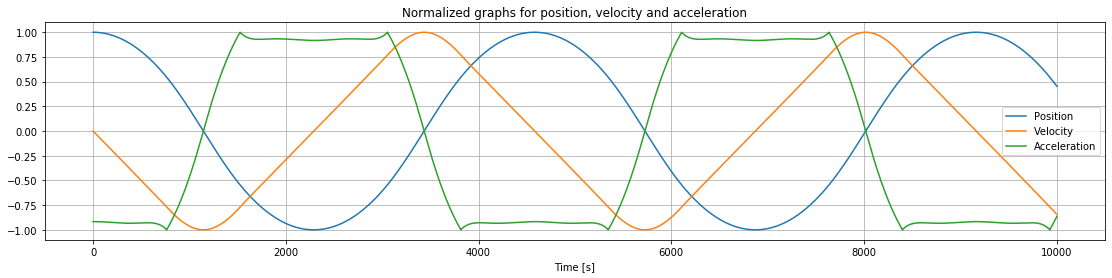

In [18]:
plt.figure(figsize=(19, 4))
plt.plot(times,positions/(np.amax(positions)),label="Position")
plt.plot(times,velocities/(np.amax(velocities)),label="Velocity")
plt.plot(times,accelerations/(np.amax(accelerations)),label="Acceleration")

plt.xlabel("Time [s]")
plt.title("Normalized graphs for position, velocity and acceleration")
plt.legend()
plt.grid()
plt.show()

With nothing stopping him, Bruce would fall all the way through the Earth and then back again, and then back again and so on. Given that gravity is a conservative force, it makes sense that he would never stop moving, but rather fall back and forth around the center.

When he reaches the center (position=0), acceleration is also 0. This is when he reaches his top velocity, as after this point gravity makes the speed decrease.

Gravity is almost constant close to the surface, which can also be seen here. This near constant gravity near the surface is what makes the velocity change so linearly between the sharper turns. The sharp turns of the velocity is due to gravity switching direction.

Bruce would have to be picked out of the air when he arrives floating upside-down on the South-Pole, as he would otherwise fall staright back, trapping him in an eternal fall, the only escape being death, or getting picked up later, whichever works. Despite being affected by an ever-changing force and travelling at blistering speeds, Bruce would not be able to feel much happening at all during the fall. Without any air or ground to push against the force of gravity, he would simply float weightlessly like an astronaut in space, with the Earth's innards moving past him like a blur.

## Summary and Conclustion

Using a model of a perfectly spherical Earth with a density given by the Preliminary Reference Earth Model, with no air resistance and no rotation I found that it would take 38 minutes and 10 seconds to fall through the entire Earth, with a top speed of 9,920 m/s along the way.

One would fall back and forth, reaching the same height each time. The model also showed that acceleration would initially increase a little before decreasing nearly linearly while falling towards the center.

These are, of course, estimates. A more accurate picture of a fall through the Earth could include a more accurate density model, air resistance, the coriolis effect, or an earth that is not perfectly spherical. Air resistance would slow down the falling object, and the coriolis effect could make the fall happen in an arch. More accurate models of the Earth's density and shape would not change the behaviour of the fall much, but would provide greater accuracy.

Even though you will probably not be falling through the Earth at any time soon, these calculations can be useful in other places. If one wanted to fly a spacecraft into a gaseous planet, one would have to look at how it would fall under the variable gravity while moving through the gases. One might even want to dig through other celestial objects, like moons or asteroids, where these kinds of calculations could be useful.

## Sources and Inspiration

Preliminary Reference Earth Model - http://ds.iris.edu/ds/products/emc-prem/

The speeds of different things - https://en.wikipedia.org/wiki/Orders_of_magnitude_(speed)

How Long To Fall Through The Earth? - minutephysics - https://www.youtube.com/watch?v=urQCmMiHKQk

Gravity of Earth - https://en.wikipedia.org/wiki/Gravity_of_Earth

Structure of the Earth https://en.wikipedia.org/wiki/Structure_of_the_Earth